 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [106]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [107]:
# Reading whale returns

whale_path= Path("Resources/whale_returns.csv")

whale_data = pd.read_csv(whale_path,index_col="Date", parse_dates=True, infer_datetime_format=True)

whale_data.head()




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [108]:
# Count nulls
whale_data.isnull().sum()



SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [109]:
# Drop nulls
whale_data = whale_data.dropna()

# Check again for nulls 

whale_data.isnull().sum()





SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [110]:
# Reading algorithmic returns

algo_path = Path("Resources/algo_returns.csv")

algo_data = pd.read_csv(algo_path, index_col = 'Date', parse_dates=True, infer_datetime_format=True)



In [111]:
# Count nulls
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [112]:
# Drop nulls

algo_data = algo_data.dropna()

# Counting nulls again

algo_data.isnull().sum()



Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [113]:
# Reading S&P 500 Closing Prices

# Reading whale returns

spx_path = Path("Resources/sp500_history.csv")

spx_data = pd.read_csv(spx_path,parse_dates=True, infer_datetime_format=True,index_col = 'Date')

# Drop nulls

spx_data = spx_data.dropna()

# Counting nulls again

spx_data.isnull().sum()


Close    0
dtype: int64

In [114]:
# Check Data Types

spx_data.dtypes

Close    object
dtype: object

In [115]:
# Fix Data Types

spx_data['Close'] = spx_data['Close'].astype('string')

spx_data["Close"] = spx_data["Close"].str.replace("$", "")

spx_data["Close"] = spx_data["Close"].astype('float')





In [116]:
# Calculate Daily Returns

spx_returns = spx_data.pct_change()


In [117]:
# Drop nulls
spx_returns_dropped  = spx_returns.dropna()


In [118]:
# Rename `Close` Column to be specific to this portfolio.

spx_returns_final = spx_returns_dropped.rename(columns={'Close':'SPX_Returns'})

spx_returns_final.index


DatetimeIndex(['2019-04-22', '2019-04-18', '2019-04-17', '2019-04-16',
               '2019-04-15', '2019-04-12', '2019-04-11', '2019-04-10',
               '2019-04-09', '2019-04-08',
               ...
               '2012-10-12', '2012-10-11', '2012-10-10', '2012-10-09',
               '2012-10-08', '2012-10-05', '2012-10-04', '2012-10-03',
               '2012-10-02', '2012-10-01'],
              dtype='datetime64[ns]', name='Date', length=1648, freq=None)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [119]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame 
# with columns for each portfolio's returns.

big_frame = pd.concat([whale_data, algo_data, spx_returns_final], axis="columns")

big_frame_clean = big_frame.sort_index().dropna()

big_frame_clean.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

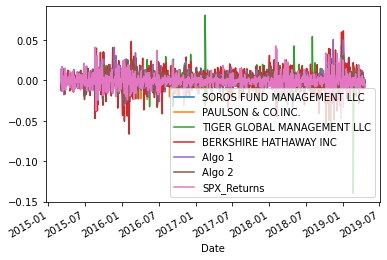

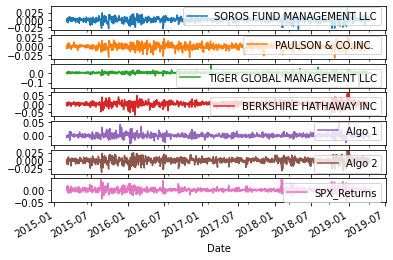

In [120]:
# Plot daily returns of all portfolios

big_frame_clean.plot()
big_frame_clean.plot(subplots = True)


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

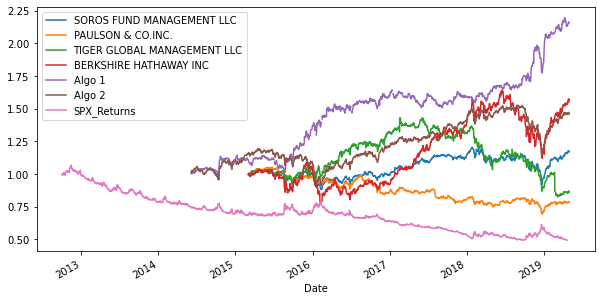

In [121]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + big_frame).cumprod()
cumulative_returns.head()

# Plot cumulative returns

cumulative_returns.plot(figsize=(10,5))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

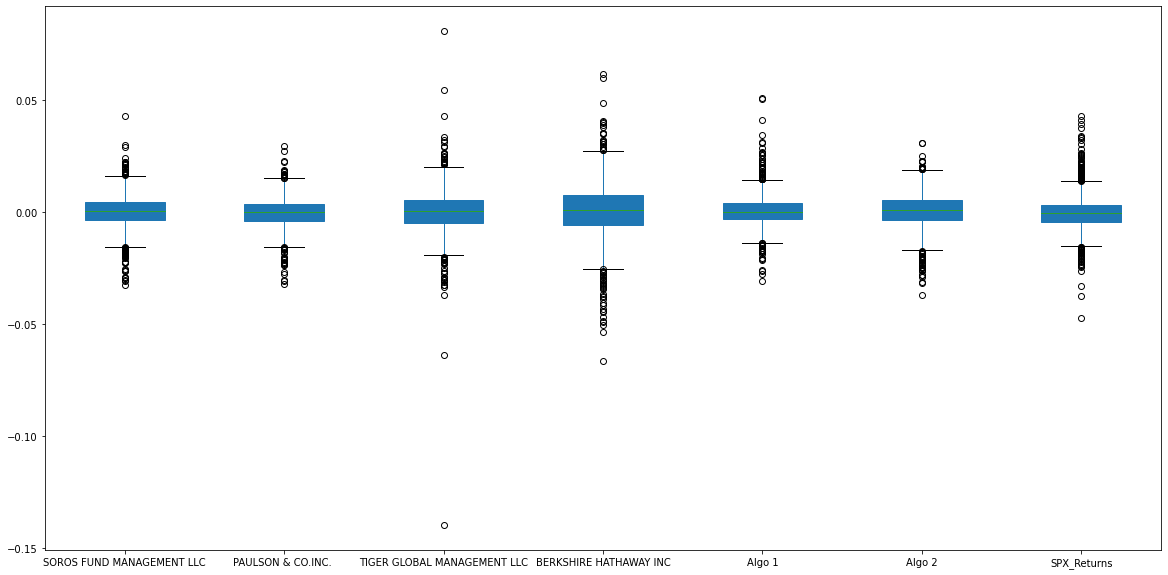

In [122]:
# Box plot to visually show risk

big_frame_clean.plot(kind='box', patch_artist=True,figsize=(20,10))


### Calculate Standard Deviations

<AxesSubplot:>

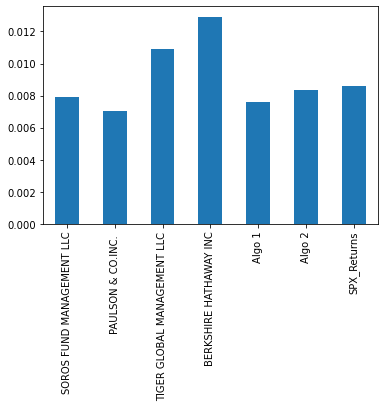

In [123]:
# Calculate the daily standard deviations of all portfolios
big_frame_clean.std().plot(kind = 'bar')

In [124]:
# Determine which portfolios are riskier than the S&P 500


From the graph above, it's clear that Berkshire, and Tiger have greater risk than SPX

In [125]:
# Calculate  the daily standard deviation of S&P 500


In [126]:
big_frame_clean['SPX_Returns'].std()

0.00858688974707399

### Calculate the Annualized Standard Deviation

<AxesSubplot:>

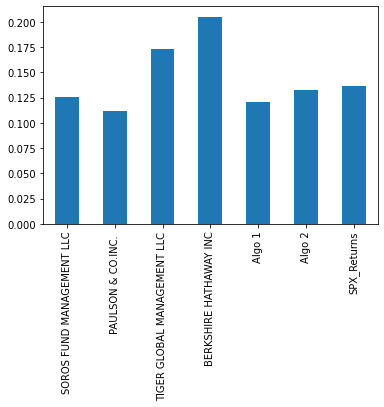

In [127]:
# Calculate the annualized standard deviation (252 trading days)

volatility = big_frame_clean.std() * np.sqrt(252)

volatility.plot(kind='bar')


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

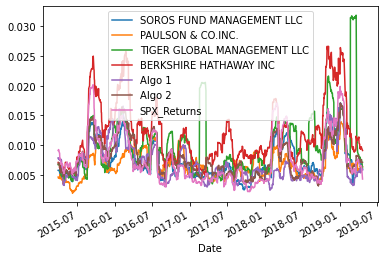

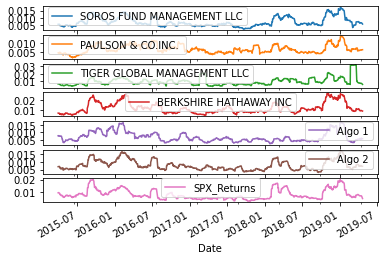

In [128]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

std_frame = big_frame_clean.rolling(window=21).std()


# Plot the rolling standard deviation
std_frame.plot()
std_frame.plot(subplots = True)

### Calculate and plot the correlation

<AxesSubplot:>

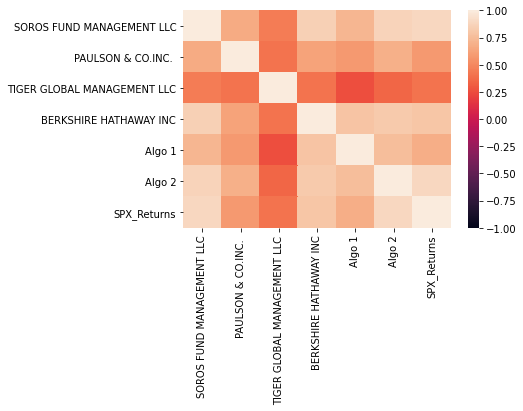

In [129]:
# Calculate the correlation

std_corr = std_frame.corr()

# Display the correlation matrix

sns.heatmap(std_corr, vmin=-1, vmax=1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

3.889726983063765e-08


<AxesSubplot:title={'center':'Rolling 30-Day Beta of Soros Fund'}, xlabel='Date'>

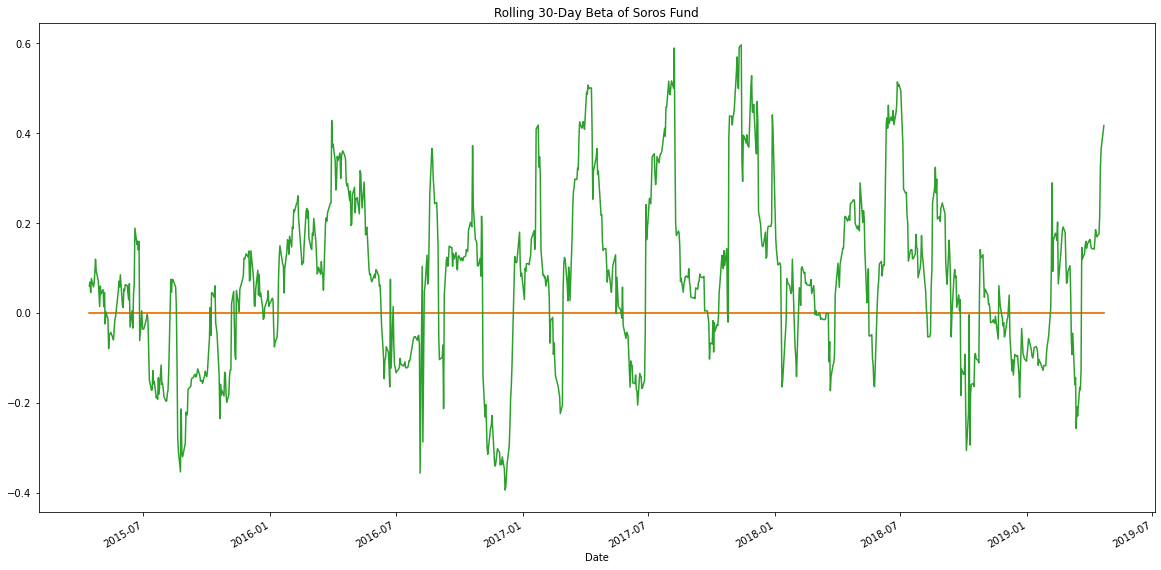

In [130]:
# Calculate covariance of a single portfolio

covariance = big_frame_clean['SOROS FUND MANAGEMENT LLC'].cov(big_frame_clean['SPX_Returns'])
print(covariance)
# Calculate variance of S&P 500

variance = big_frame_clean['SPX_Returns'].var()

# Computing beta

fund_beta =covariance / variance

# Plot beta trend
rolling_covariance = big_frame_clean['SOROS FUND MANAGEMENT LLC'].rolling(window=30).cov(big_frame_clean['SPX_Returns'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 30-Day Covariance of Soros Returns vs. S&P 500 Returns')

rolling_variance = big_frame_clean['SPX_Returns'].rolling(window=30).var()
rolling_variance.plot(figsize=(20, 10), title='Rolling 30-Day Variance of S&P 500 Returns')

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Soros Fund')


# Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

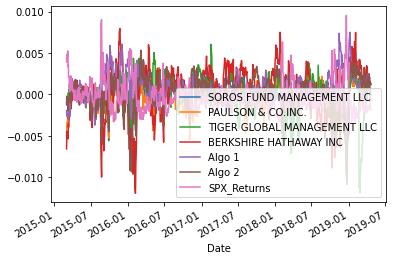

In [131]:
# Use `ewm` to calculate the rolling window
#
ewm_frame = big_frame_clean.ewm(span=21, adjust=False).mean()

ewm_frame.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [132]:
# Annualized Sharpe Ratios

sharpe_ratios = (big_frame_clean.mean() * 252) / (big_frame_clean.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SPX_Returns                   -0.518582
dtype: float64

<AxesSubplot:>

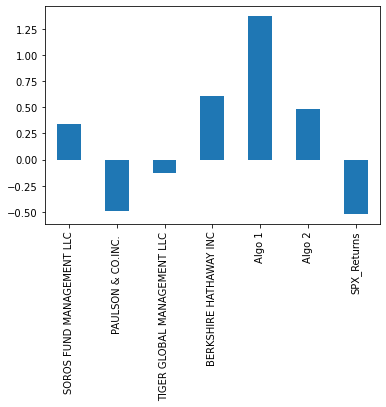

In [133]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

It is clear that Algo 1 outperforms on a risk-adjusted basis. It also has the highest return.  



---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [134]:
# Reading data from 1st stock


In [135]:
# Reading data from 2nd stock


In [136]:
# Reading data from 3rd stock


In [137]:
# Combine all stocks in a single DataFrame


In [138]:
# Reset Date index


In [139]:
# Reorganize portfolio data by having a column per symbol


In [140]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [141]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [142]:
# Join your returns DataFrame to the original returns DataFrame


In [143]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [144]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [145]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [146]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [147]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [148]:
# Calculate Annualzied Sharpe Ratios


In [149]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!